In [124]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import probplot
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import os
import sys

%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [125]:
data=pd.read_csv('project_regression_data_clean.csv')

In [126]:
data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [127]:
data.head(2)

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/14         3       1.00         1180      5650     1.0   
1  6414100192   12/9/14         3       2.25         2570      7242     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000

In [128]:
data.value_counts()

id          date      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15  price  
9900000190  10/30/14  3         1.00       1320         8100      1.0     0           0     3          6      880         440            1943      0             98166    47.4697  -122.351  1000           8100        268950     1
2767603824  9/15/14   2         2.50       1240         1249      3.0     0           0     3          8      1240        0              2006      0             98107    47.6718  -122.386  1240           2500        459000     1
2767603577  5/6/15    2         1.50       1170         1250      3.0     0           0     3          8      1170        0              2000      0             98107    47.6719  -122.380  1310           1308        475000     1
2767603591  8/4/14    3         2.50       1320         1310      3.0     0           0  

In [129]:
# data=pd.read_excel('project_creditcardmarketing_clean.xlsx')

In [130]:
# data.head()

In [131]:
def display_missing(df):
    """shows the number of missing values of each column for a date_frame, if there is one"""
    for col in df.columns.tolist():
        if df[col].isnull().sum():
            print('{} column missing values: {}/{}'.format(col, df[col].isnull().sum(), len(df)))
    print ('Done checking for missing values')

In [132]:
display_missing(data)

Done checking for missing values


In [133]:
# display_missing(classi)

In [134]:
num=data.select_dtypes(include='number')
col=data.select_dtypes(include='object')

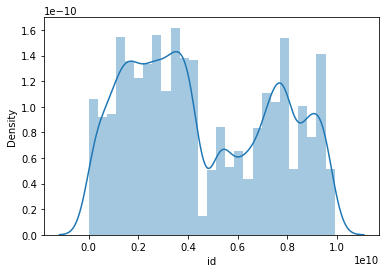

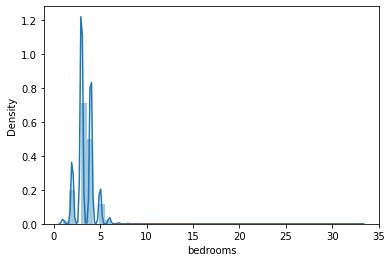

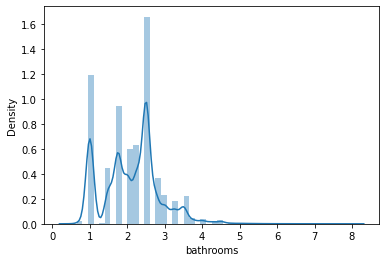

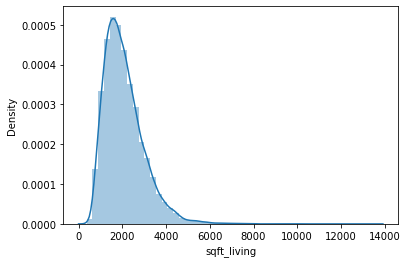

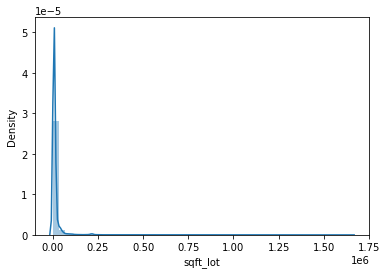

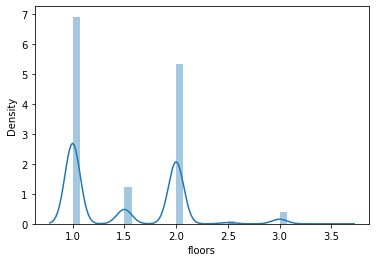

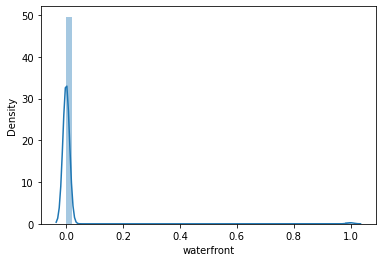

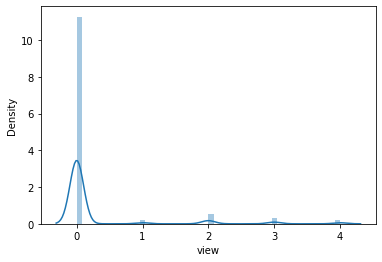

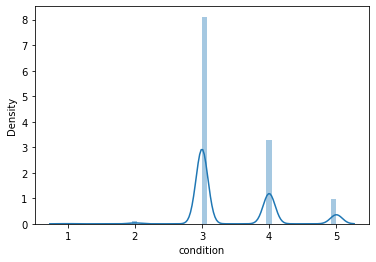

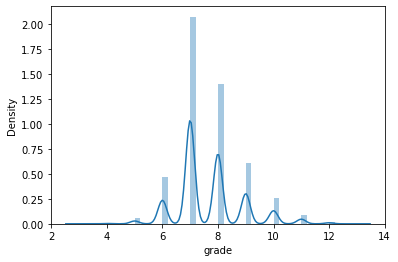

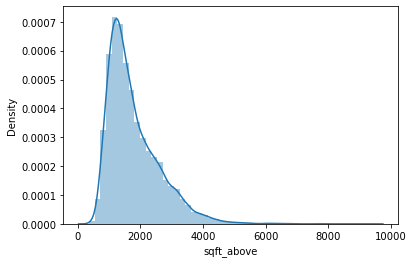

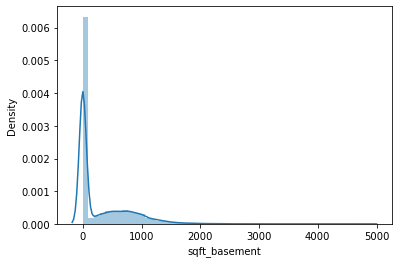

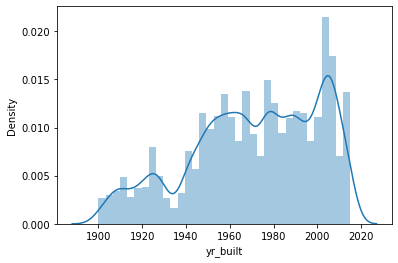

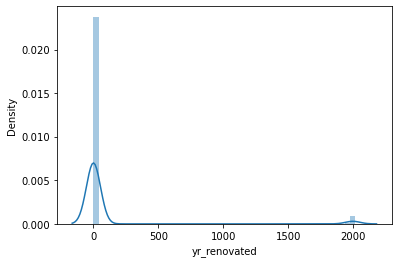

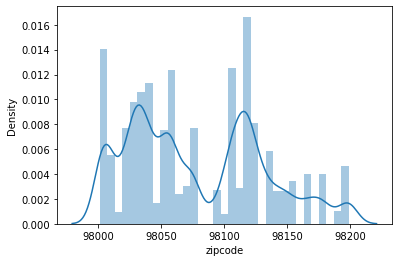

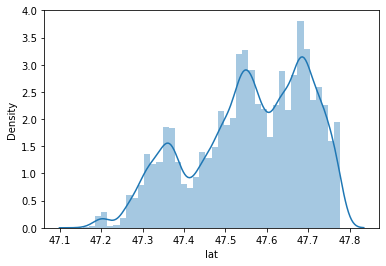

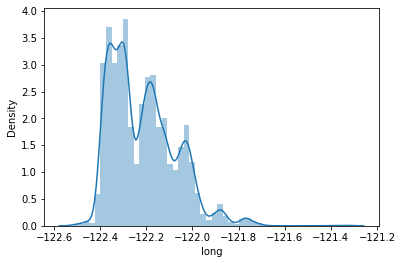

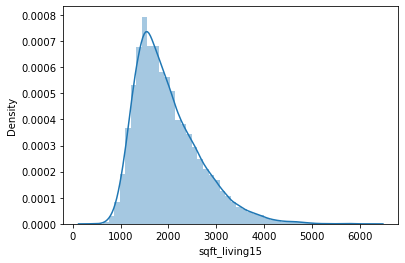

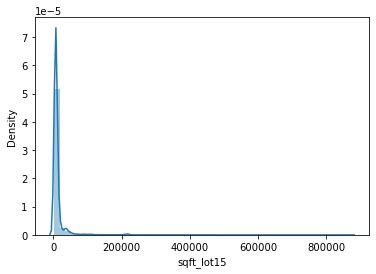

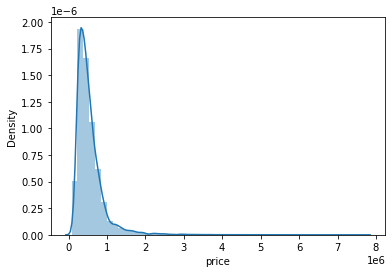

In [135]:
for i in num:
    sns.distplot(num[i])
    plt.show()

In [136]:
for i in data.columns:
    print(data[i].name)
    print(data[i].unique())

id
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
date
['10/13/14' '12/9/14' '2/25/15' '2/18/15' '5/12/14' '6/27/14' '1/15/15'
 '4/15/15' '3/12/15' '4/3/15' '5/27/14' '5/28/14' '10/7/14' '1/24/15'
 '7/31/14' '5/29/14' '12/5/14' '4/24/15' '5/14/14' '8/26/14' '7/3/14'
 '5/16/14' '11/20/14' '11/3/14' '6/26/14' '12/1/14' '6/24/14' '3/2/15'
 '11/10/14' '12/3/14' '6/13/14' '12/30/14' '2/13/15' '6/20/14' '7/15/14'
 '8/11/14' '7/7/14' '10/28/14' '7/29/14' '7/18/14' '3/25/15' '7/16/14'
 '4/28/15' '3/11/15' '9/16/14' '2/17/15' '12/31/14' '2/5/15' '3/3/15'
 '8/19/14' '4/7/15' '8/27/14' '2/23/15' '12/10/14' '8/28/14' '10/21/14'
 '12/7/14' '6/3/14' '9/9/14' '10/9/14' '8/25/14' '6/12/14' '9/12/14'
 '1/5/15' '6/10/14' '7/10/14' '3/16/15' '11/5/14' '4/20/15' '6/9/14'
 '3/23/15' '12/2/14' '12/22/14' '1/28/15' '6/2/14' '11/14/14' '6/18/14'
 '5/19/14' '9/4/14' '5/22/14' '2/26/15' '7/25/14' '12/23/14' '9/8/14'
 '3/30/15' '7/11/14' '6/11/14' '10/27/14' '12/12/14' '9/24/14' '4/2/15'

In [137]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
date - 0%
bedrooms - 0%
bathrooms - 0%
sqft_living - 0%
sqft_lot - 0%
floors - 0%
waterfront - 0%
view - 0%
condition - 0%
grade - 0%
sqft_above - 0%
sqft_basement - 0%
yr_built - 0%
yr_renovated - 0%
zipcode - 0%
lat - 0%
long - 0%
sqft_living15 - 0%
sqft_lot15 - 0%
price - 0%


In [138]:
print('Categorical Features:', len(num))
print('----------')
for c in num:
    print('Name: {}'.format(num[c].name))    # column name
    print('Type: {}'.format(num[c].dtype))   # column type
    print('Unique values: {}'.format(len(num[c].unique())))   # column unique values
    print(num[c].unique())
    print(((num[c].value_counts()/ sum(num[c].value_counts()))*100))   # percentage
    print('\n----------')


Categorical Features: 21597
----------
Name: id
Type: int64
Unique values: 21420
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
795000620     0.013891
1825069031    0.009261
2019200220    0.009261
7129304540    0.009261
1781500435    0.009261
3969300030    0.009261
2560801222    0.009261
3883800011    0.009261
2228900270    0.009261
251300110     0.009261
5282200015    0.009261
2787460720    0.009261
5536100020    0.009261
2568300045    0.009261
8648900110    0.009261
8910500150    0.009261
2044500213    0.009261
4222310010    0.009261
8651402750    0.009261
8820903380    0.009261
4345000510    0.009261
641900050     0.009261
1823049202    0.009261
8121100395    0.009261
6308000010    0.009261
1139600270    0.009261
937000330     0.009261
3293700496    0.009261
4435000705    0.009261
5430300171    0.009261
7899800045    0.009261
6021500970    0.009261
4202400078    0.009261
4204400098    0.009261
7409700215    0.009261
9136103130    0.009261
726049190     0.009

47.6624    0.078715
47.5322    0.078715
47.6846    0.078715
47.5491    0.078715
47.6886    0.074084
47.6711    0.074084
47.6955    0.074084
47.6904    0.069454
47.6647    0.069454
47.5402    0.069454
47.6842    0.069454
47.6860    0.069454
47.6853    0.064824
47.5518    0.064824
47.6914    0.064824
47.5533    0.064824
47.5323    0.064824
47.6821    0.064824
47.5445    0.064824
47.5400    0.064824
47.6651    0.064824
47.6844    0.064824
47.6374    0.064824
47.5427    0.064824
47.6727    0.064824
47.5342    0.064824
47.5396    0.064824
47.7076    0.064824
47.6534    0.064824
47.6729    0.064824
47.6801    0.060194
47.6970    0.060194
47.6684    0.060194
47.6285    0.060194
47.6754    0.060194
47.5503    0.060194
47.6368    0.060194
47.6968    0.060194
47.5659    0.060194
47.6857    0.060194
47.6765    0.060194
47.6981    0.060194
47.6875    0.060194
47.6916    0.060194
47.6971    0.060194
47.6388    0.060194
47.5305    0.060194
47.7222    0.055563
47.7289    0.055563
47.5707    0.055563


In [139]:
data['date']= pd.to_datetime(data['date'],errors='coerce')

ValueError: num must be 1 <= num <= 9, not 10

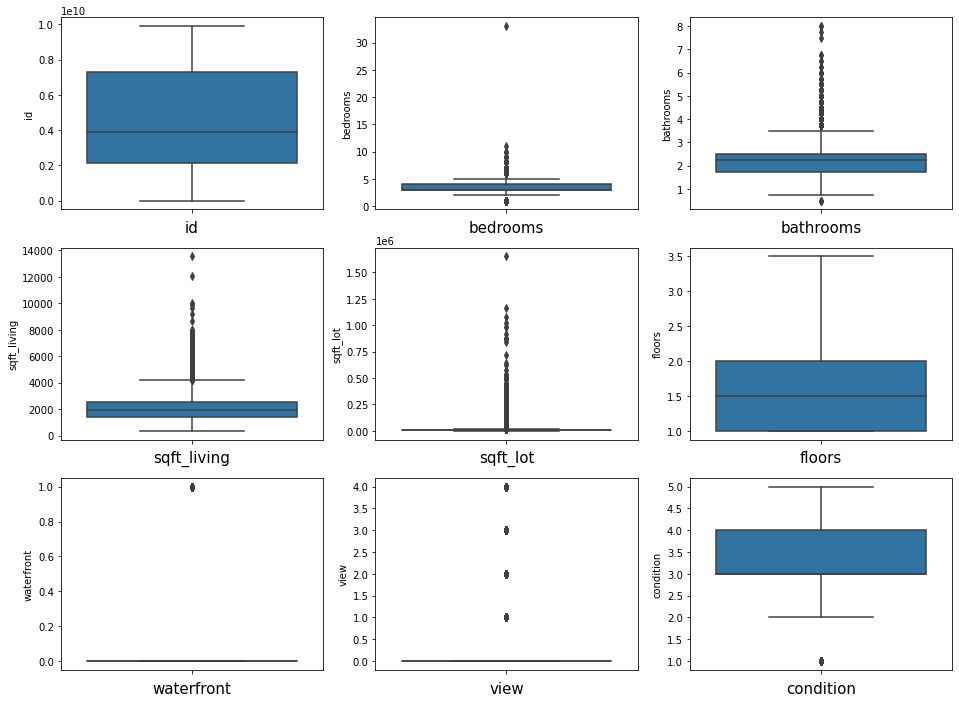

In [140]:
fig,axs = plt.subplots(ncols=3, nrows=3, figsize =(9, 12))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(num, 1):    
    plt.subplot(3, 3, i)
    sns.boxplot(y=feature, data=num)
    plt.xlabel('{}'.format(feature), size=15)
#     plt.ylabel('', size=15, labelpad=12.5)
plt.show()


In [ ]:
correlations_matrix= num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [ ]:
# def feat_log_box(df, feature, bins = 100):
#     """makes a log Transformation and a boxcox transformation of a feature of a dataframe. \n
#     0 values are replaced with the mean in the transformation: \n
#     plots 3 distplots next to each other for comparison \n
#     tales 3 arguments (df, feature, bins)"""
#     df[feature+'_log'] = list(map(lambda x: np.log(x) if np.isfinite(x) and x!=0 else np.NAN, df[feature]))
#     df[feature+'_log'] = df[feature+'_log'].fillna(np.mean(df[feature+'_log']))
#     df[feature+'_boxcox'] = np.where(df[feature]<=0,0,df[feature])
#     mean = np.sum(df[feature+'_boxcox'])/len(df[df[feature+'_boxcox']>0])
#     df[feature+'_boxcox'] = df[feature+'_boxcox'].replace(0,mean)
#     xt, lmbda = stats.boxcox(df[feature+'_boxcox'])
#     df[feature+'_boxcox'] = xt
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4))
#     sns.distplot(df[feature], bins, ax=ax1)
#     ax1.set_title(feature)
#     sns.distplot(df[feature+'_log'], bins, ax=ax2)
#     ax2.set_title(feature + '_log')
#     sns.distplot(xt, bins, ax=ax3)
#     ax3.set_title(feature + '_boxcox')
#     return df

In [ ]:
print('data Price Mean: {}'.format(data['price'].mean()))
print('data Price Median: {}'.format(data['price'].median()))
print('data Price Max: {}'.format(data['price'].max()))
print('data Price Skew: {}'.format(data['price'].skew()))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,2))
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None)

sns.distplot(data['price'], hist=True, bins = 100, ax=ax1)
probplot(data['price'], plot=ax2)
data.boxplot('price', ax=ax3)

ax1.set_xlabel('price', size=10, labelpad=8)
ax2.set_xlabel('Theoretical Quantiles', size=10, labelpad=8)
ax2.set_ylabel('Ordered Values', size=10, labelpad=8)

ax1.set_title('Distribution of price in whole dataset', size=12, y=1.05)
ax2.set_title('Price Probability Plot', size=12, y=1.05)

plt.show()

In [ ]:
# def outliers(column, threshold = 3): #define a funciton like this, so there is a predefault value
#     '''labels oultiers, dedect outliers according to mean and standartddeviation 
#     and a defined threshld which is the nuer of standarddeviations,taht are the outliers, outlier has to be removed still'''
#     return column[abs(column.apply(lambda x: (x-column.mean())/column.var() **(1/2))) >threshold]